Data Wrangling/ Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("sales_analysis.csv")
df.head()


,order_id,order_date,customer_name,gender,city,state,product,category,quantity,price,total_sales
0,1001,2025-01-02,Amit Sharma,M,Delhi,Delhi,Mobile,Electronics,2,15000,30000
1,1011,2025-01-15,Amit Sharma,M,Delhi,Delhi,Earbuds,Electronics,2,3000,6000
2,1002,2025-01-03,Neha Verma,F,Mumbai,Maharashtra,Laptop,Electronics,1,55000,55000
3,1012,2025-01-16,Neha Verma,F,Mumbai,Maharashtra,Office Chair,Furniture,1,9000,9000
4,1003,2025-01-04,Rahul Das,M,Kolkata,West Bengal,Chair,Furniture,4,3000,12000


In [3]:
df.shape        


(12, 11)

In [4]:
df.columns    


Index(['order_id', 'order_date', 'customer_name', 'gender', 'city', 'state',
       'product', 'category', 'quantity', 'price', 'total_sales'],
      dtype='object')

In [5]:
df.info()      


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       12 non-null     int64 
 1   order_date     12 non-null     object
 2   customer_name  12 non-null     object
 3   gender         12 non-null     object
 4   city           12 non-null     object
 5   state          12 non-null     object
 6   product        12 non-null     object
 7   category       12 non-null     object
 8   quantity       12 non-null     int64 
 9   price          12 non-null     int64 
 10  total_sales    12 non-null     int64 
dtypes: int64(4), object(7)
memory usage: 1.2+ KB


In [6]:
df.isnull().sum()


order_id         0
order_date       0
customer_name    0
gender           0
city             0
state            0
product          0
category         0
quantity         0
price            0
total_sales      0
dtype: int64

In [7]:
df["order_date"] = pd.to_datetime(df["order_date"])


In [8]:
df.dtypes


order_id                  int64
order_date       datetime64[ns]
customer_name            object
gender                   object
city                     object
state                    object
product                  object
category                 object
quantity                  int64
price                     int64
total_sales               int64
dtype: object

In [9]:
df["month"] = df["order_date"].dt.month_name()
df["year"] = df["order_date"].dt.year


In [10]:
df.head()


,order_id,order_date,customer_name,gender,city,state,product,category,quantity,price,total_sales,month,year
0,1001,2025-01-02,Amit Sharma,M,Delhi,Delhi,Mobile,Electronics,2,15000,30000,January,2025
1,1011,2025-01-15,Amit Sharma,M,Delhi,Delhi,Earbuds,Electronics,2,3000,6000,January,2025
2,1002,2025-01-03,Neha Verma,F,Mumbai,Maharashtra,Laptop,Electronics,1,55000,55000,January,2025
3,1012,2025-01-16,Neha Verma,F,Mumbai,Maharashtra,Office Chair,Furniture,1,9000,9000,January,2025
4,1003,2025-01-04,Rahul Das,M,Kolkata,West Bengal,Chair,Furniture,4,3000,12000,January,2025


In [13]:
#Total Revenue
total_revenue = df["total_sales"].sum()
total_revenue


268000

In [14]:
#Total Orders
total_orders = df["order_id"].nunique()
total_orders


12

In [15]:
#Average Order Value
avg_order_value = total_revenue / total_orders
avg_order_value

22333.333333333332

BUSINESS ANALYSIS

In [16]:
#City-wise Revenue
city_sales = (
    df.groupby("city")["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
city_sales


,city,total_sales
0,Mumbai,64000
1,Ahmedabad,42000
2,Delhi,42000
3,Kochi,36000
4,Kolkata,34000
5,Jaipur,28000
6,Lucknow,14000
7,Pune,8000


In [17]:
#Category-wise Revenue
category_sales = (
    df.groupby("category")["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
category_sales


,category,total_sales
0,Electronics,197000
1,Furniture,71000


In [18]:
#Top Customers
top_customers = (
    df.groupby("customer_name")["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
top_customers


,customer_name,total_sales
0,Neha Verma,64000
1,Arjun Mehta,42000
2,Amit Sharma,36000
3,Pooja Nair,36000
4,Karan Gupta,28000
5,Anjali Roy,22000
6,Rohit Yadav,14000
7,Rahul Das,12000
8,Sneha Patil,8000
9,Priya Singh,6000


Basic Data Visualization

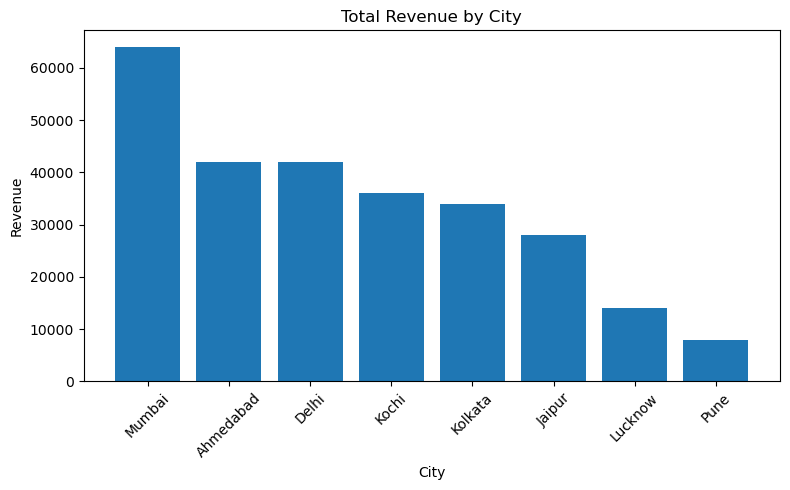

In [19]:
#TOTAL REVENUE BY CITY (BAR CHART)
import matplotlib.pyplot as plt

city_sales = df.groupby("city")["total_sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.bar(city_sales.index, city_sales.values)
plt.title("Total Revenue by City")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


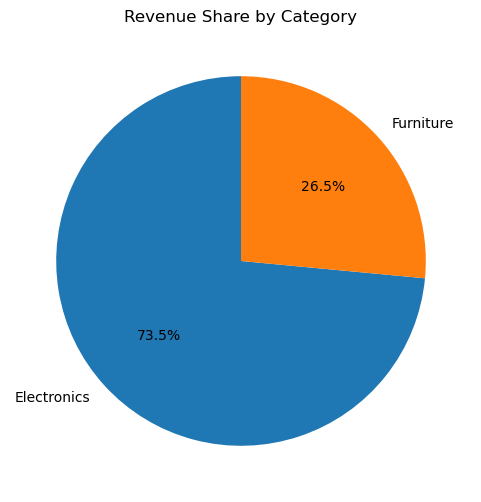

In [20]:
#CATEGORY-WISE REVENUE (PIE CHART)
category_sales = df.groupby("category")["total_sales"].sum()

plt.figure(figsize=(6,6))
plt.pie(
    category_sales.values,
    labels=category_sales.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Revenue Share by Category")
plt.show()


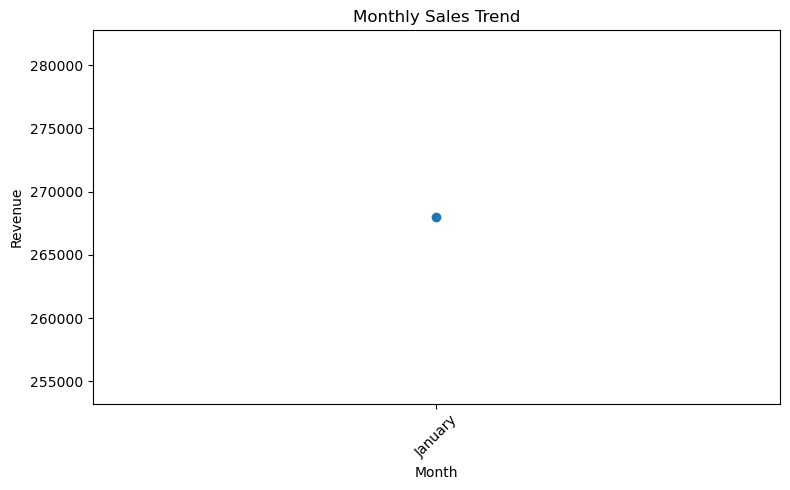

In [22]:
#MONTHLY SALES TREND (LINE CHART)
monthly_sales = (
    df.groupby("month")["total_sales"]
    .sum()
)

plt.figure(figsize=(8,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
df["month"].value_counts()


month
January    12
Name: count, dtype: int64

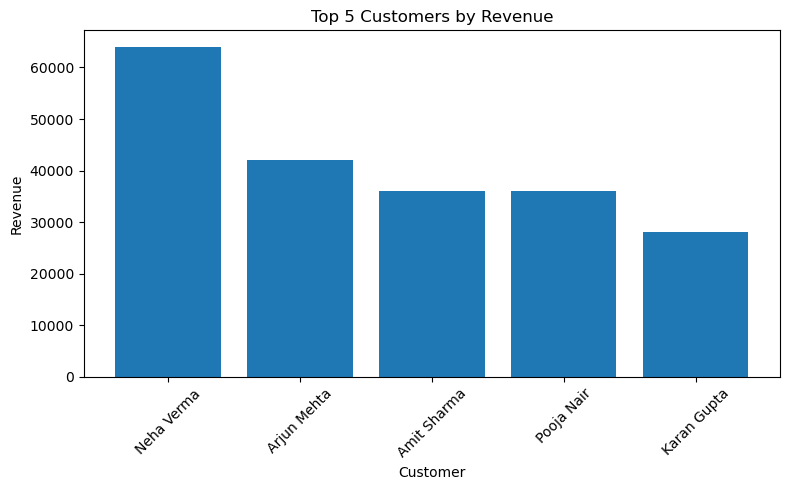

In [24]:
#TOP 5 CUSTOMERS (BAR CHART)
top_customers = (
    df.groupby("customer_name")["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

plt.figure(figsize=(8,5))
plt.bar(top_customers.index, top_customers.values)
plt.title("Top 5 Customers by Revenue")
plt.xlabel("Customer")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


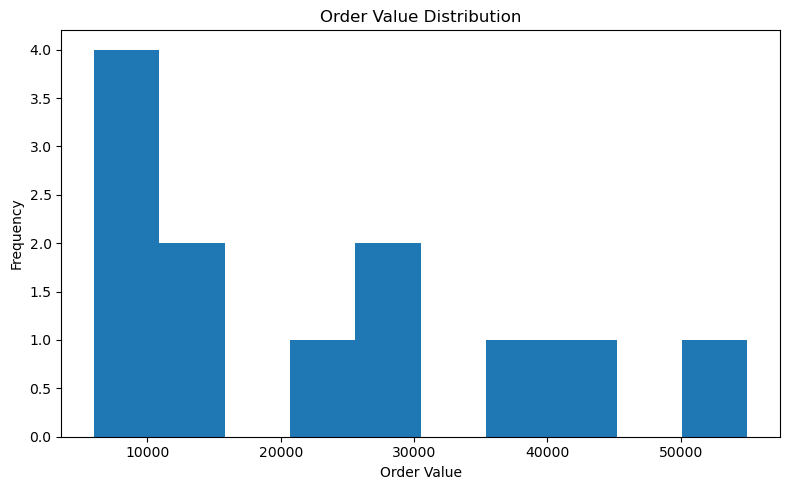

In [25]:
#ORDER VALUE DISTRIBUTION (HISTOGRAM)
plt.figure(figsize=(8,5))
plt.hist(df["total_sales"], bins=10)
plt.title("Order Value Distribution")
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


Final Clean data for powerbi


In [26]:
df.to_csv("final_sales_data.csv", index=False)
